<a href="https://colab.research.google.com/github/anuragb1090/JH_Agriculture/blob/master/001_EDA_JH_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %%time

# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/train_yaOffsB.csv')
test = pd.read_csv('/content/test_pFkWwen.csv')

# sample_submission = pd.read_csv('/content/sample_submission_V9Inaty.csv.csv')
print('Train shape:{}'.format(train.shape))
print('Test shape:{}'.format(test.shape))

Train shape:(88858, 10)
Test shape:(59310, 9)


In [ ]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
train['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

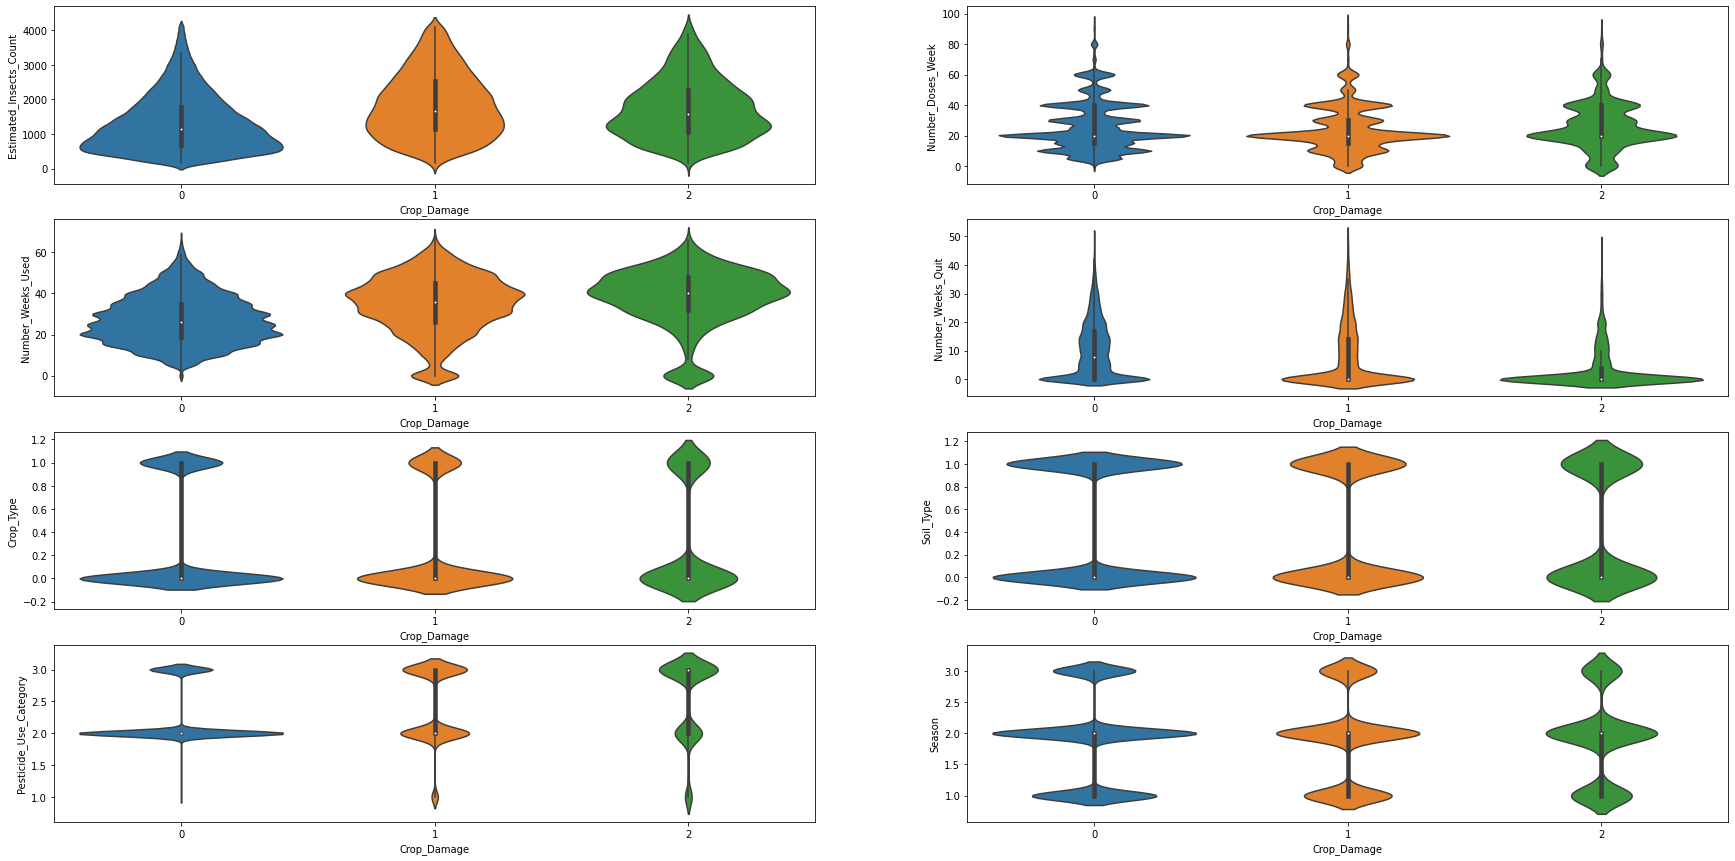

In [ ]:
fig, ax = plt.subplots(4,2,figsize=(30,15))

cols_to_plot = ['Estimated_Insects_Count', 'Number_Doses_Week',
                'Number_Weeks_Used', 'Number_Weeks_Quit', 'Crop_Type',
                'Soil_Type', 'Pesticide_Use_Category', 'Season']

for i in range(0, len(cols_to_plot)):
  sns.violinplot(x=train['Crop_Damage'], y=train[cols_to_plot[i]], ax=ax[int(i/2)][i%2])

In [ ]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          8903
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
train.loc[train['Number_Doses_Week']==0,'Number_Weeks_Used'] = 0

In [ ]:
train['Number_Weeks_Used'].fillna(np.mean(train['Number_Weeks_Used']), inplace=True)

In [ ]:
train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [ ]:
train.to_csv('001_train.csv', index=False)
test.to_csv('001_test.csv', index=False)